In [285]:
from sys import path as syspath
from pathlib import Path

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
import seaborn as sns
import matplotlib.pyplot as plt

db = rf.db()

# Optical Constant Database

* This is not a real database
* Relationships are handled by a .json file
* The json file location is saved to a config file in the module directory


In [286]:
# rf.init_db(path_to_your_db)

# Oriented Optical Constants From NEXAFS (Or DFT)

The `pyref` module provides a simple interface to our database of nexafs data, and to the DFT calculations that we use to simulate it. Additionaly, it provides a simple interface for calculating the optical constants from the DFT calculations. This is done using the `AngleNexafs` class, which is a subclass of the `DataFrame` class. This class overloades the generation method to accept file names as well as the standard `DataFrame` inputs. The `AngleNexafs` class also provides a method for calculating the optical constants from the DFT calculations. This is done using a series of methods. 

The first step is to load the data from a file.


C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.data\nexafs\C32H16N8Zn.raw


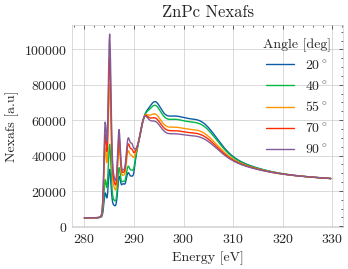

In [287]:
f = db.nexafs / "C32H16N8Zn.raw"
print(f)
dft = rf.AngleNexafs(f, "C32H16N8Zn", density=1.37429051377332, name = "ZnPc")  # type: ignore
dft.plot_ar()

C:\Users\hduva\pyref\src\pyref\core\frame.py:532: UserWarning: Normalizing only the isotropic data. NEXAFS is likely only one angle.
  warnings.warn(


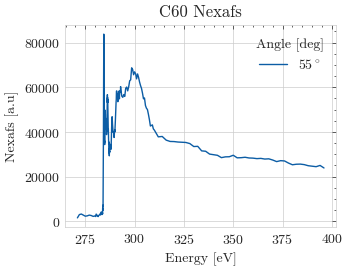

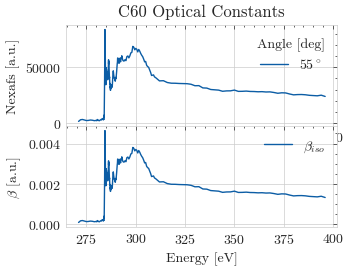

In [288]:
c60_f = db.nexafs / "C60.raw"
C60 = rf.AngleNexafs(c60_f, molecular_name = "C60", density=1.65, name = "C60", angles = None, read_kwargs={"sep": "\t"}) # type: ignore
C60.plot_ar()
C60.get_ooc()

Now that this is done, we compute the difference spectra of the data. As a standard, we use the first and last energies to compute the difference spectra. This is done using the `get_diffspec` method. This method adds a new collumn to the dataframe called 'Diff'. 

,20,40,55,70,90,Diff
Energy [eV],,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.688,4761.02,-20.5805
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257
280.199906,4796.2891,4789.6636,4774.02,4766.9688,4760.8457,-22.2691
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135
...,...,...,...,...,...,...
329.300188,27068.424,27067.021,27063.592,27062.053,27060.727,-4.832
329.399116,27048.811,27047.443,27044.199,27042.717,27041.465,-4.612
329.500178,27029.438,27028.129,27025.018,27023.607,27022.389,-4.42


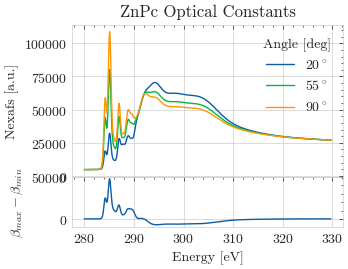

In [289]:
dft.get_diffspec()
dft

KeyError: '$\\beta_{iso}$'

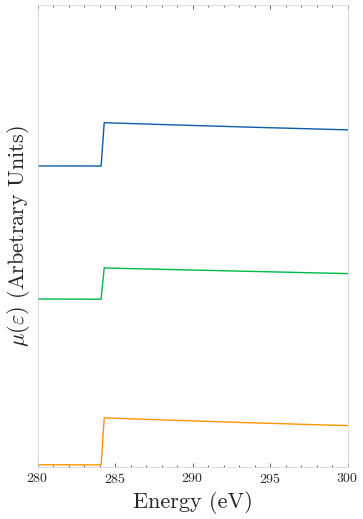

In [290]:
# index of refraction

from periodictable.xsf import index_of_refraction
shift = [0, -.005, -.011]

fig, ax = plt.subplots(figsize=(4, 6), edgecolor="white", facecolor="white")

en = PS.index * 1e-3
ps_ba = -index_of_refraction("C8H8", density = 1, energy = en).imag
c70_ba = -index_of_refraction("C70", density = 1, energy = en).imag
znpc_ba = -index_of_refraction("C32H16N8Zn1", density = 1, energy = en).imag


ax.plot(PS.index, ps_ba+shift[0])
ax.plot(PS.index, znpc_ba+shift[1])
ax.plot(PS.index, c70_ba+shift[2])
# ax.plot(PS.index, PS[r"$\beta_{iso}$"])
# ax.plot(dft.index, dft[r"$\beta_{iso}$"]+shift[1])
# ax.plot(C60.index, C60[r"$\beta_{iso}$"]+shift[2])

ax.set_xlim(280, 300)
ax.set_ylim(shift[2], 0.006)

ax.grid(False)


ax.set_yticks([])
ax.set_ylabel(r"$\mu (\varepsilon)$ (Arbetrary Units)", fontsize=16)
ax.set_xlabel(r"Energy (eV)", fontsize=16)
ax.tick_params(axis="x", bottom=True, which="both")

peaks_ps = find_peaks(PS[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]
peaks_znpc = find_peaks(dft[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]
peaks_c60 = find_peaks(C60[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]

pi_ps = peaks_ps[:3]
pi_znpc = peaks_znpc[:2]
pi_c60 = peaks_c60[:3]
ax.text(280.5, shift[0]+.0005, "PS", color="C0")
ax.text(280.5, shift[1]+.0005, "ZnPc", color="C1")
ax.text(280.5, shift[2]+.0005, "C70", color="C2")

fig.savefig("BA Diffs0.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")

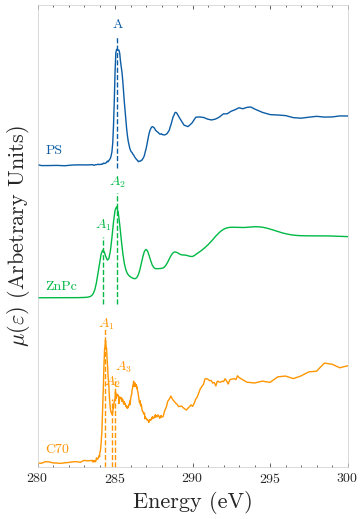

In [ ]:
from scipy.signal import find_peaks
import matplotlib.animation as animation
import scienceplots
plt.style.use(["science", "no-latex"])

fig, ax = plt.subplots(figsize=(4, 6), edgecolor="white", facecolor="white")

# nearest neighbor average smooth C60 data

shift = [0, -.005, -.011]

ax.plot(PS.index, PS[r"$\beta_{iso}$"])
ax.plot(dft.index, dft[r"$\beta_{iso}$"]+shift[1])
ax.plot(C60.index, C60[r"$\beta_{iso}$"]+shift[2])

ax.set_xlim(280, 300)
ax.set_ylim(shift[2], 0.006)

ax.grid(False)


ax.set_yticks([])
ax.set_ylabel(r"$\mu (\varepsilon)$ (Arbetrary Units)", fontsize=16)
ax.set_xlabel(r"Energy (eV)", fontsize=16)
ax.tick_params(axis="x", bottom=True, which="both")

peaks_ps = find_peaks(PS[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]
peaks_znpc = find_peaks(dft[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]
peaks_c60 = find_peaks(C60[r"$\beta_{iso}$"], height=1e-3, distance=4)[0]

pi_ps = peaks_ps[:3]
pi_znpc = peaks_znpc[:2]
pi_c60 = peaks_c60[:3]
ax.text(280.5, shift[0]+.0005, "PS", color="C0")
ax.text(280.5, shift[1]+.0005, "ZnPc", color="C1")
ax.text(280.5, shift[2]+.0005, "C70", color="C2")

fig.savefig("Nexafs Diffs0.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")
for i in pi_ps:
    ax.vlines(PS.index[i], 0, PS[r"$\beta_{iso}$"].iloc[i]+.0005, color="C0", linestyle="--")
    if i > 100:
        ax.text(PS.index[i]-.3, PS[r"$\beta_{iso}$"].iloc[i]+.0008, f"A", color="C0")

fig.savefig("Nexafs Diffs1.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")
labels = [r"$A_1$", r"$A_2$", r"$A_3$"]
for j,i in enumerate(pi_znpc):
    ax.vlines(dft.index[i], shift[1], dft[r"$\beta_{iso}$"].iloc[i]+shift[1]+.0005, color="C1", linestyle="--")
    ax.text(dft.index[i]-.5, dft[r"$\beta_{iso}$"].iloc[i]+shift[1]+.0008, labels[j], color="C1")

fig.savefig("Nexafs Diffs2.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")
for j,i in enumerate(pi_c60):
    ax.vlines(C60.index[i], shift[2], C60[r"$\beta_{iso}$"].iloc[i]+shift[2]+.0005, color="C2", linestyle="--")

ax.text(C60.index[pi_c60[0]]-.5, C60[r"$\beta_{iso}$"].iloc[pi_c60[0]]+shift[2]+.0005, r"$A_1$", color="C2")
ax.text(C60.index[pi_c60[1]]-.5, C60[r"$\beta_{iso}$"].iloc[pi_c60[1]]+shift[2]+.001, r"$A_2$", color="C2")
ax.text(C60.index[pi_c60[2]], C60[r"$\beta_{iso}$"].iloc[pi_c60[2]]+shift[2]+.0008, r"$A_3$", color="C2")

fig.savefig("Nexafs Diffs3.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")

## Calculating the oriented optical constants

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$
Energy [eV],,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.688,4761.02,-20.5805,0.000209,0.000214,0.000212,0.001154,0.000229
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000209,0.000214,0.000212,0.001143,0.000228
280.199906,4796.2891,4789.6636,4774.02,4766.9688,4760.8457,-22.2691,0.000209,0.000214,0.000212,0.001132,0.000228
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000209,0.000214,0.000212,0.001120,0.000228
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000209,0.000214,0.000212,0.001109,0.000228
...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.424,27067.021,27063.592,27062.053,27060.727,-4.832,0.001203,0.001204,0.001203,0.001888,0.001124
329.399116,27048.811,27047.443,27044.199,27042.717,27041.465,-4.612,0.001202,0.001203,0.001202,0.001888,0.001123
329.500178,27029.438,27028.129,27025.018,27023.607,27022.389,-4.42,0.001201,0.001202,0.001202,0.001887,0.001122


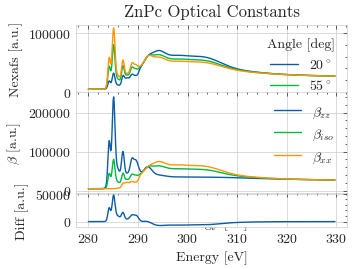

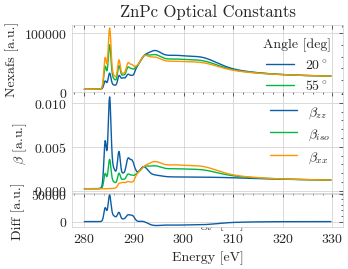

In [ ]:
dft.get_ooc(normalize=False) # You can skip this step if you use the default normalize = True
# However, these are not in the same units as optical constants should be
# So instead, we need to normalize the spectra to the bare atom sectra
dft.normalize()
dft.plot_beta()
dft

## Kramers Kronig Transformation

The `get_kk()` method implements the kramers kronig transformation from the `kkcalc` module to calculate the calculate $\delta$. This creates a series of functions that return $\delta$ and $\beta$ for each principle axis (`delta_xx`, `beta_xx`, `delta_zz`, `beta_zz`), the average axis (`delta_iso`, `beta_iso`). These are generated via linear interpolation using the extended energy domain. Additionally, optical constants are calculated over the experimental energy range and added to the dataframe. 

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$,$\delta_{xx}$,$\delta_{zz}$,$\delta_{iso}$
Energy [eV],,,,,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.688,4761.02,-20.5805,0.000209,0.000214,0.000212,0.001154,0.000229,0.000873,5.763652e-05,0.000612
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000209,0.000214,0.000212,0.001143,0.000228,0.000865,2.965338e-05,0.000598
280.199906,4796.2891,4789.6636,4774.02,4766.9688,4760.8457,-22.2691,0.000209,0.000214,0.000212,0.001132,0.000228,0.000857,8.449663e-07,0.000583
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000209,0.000214,0.000212,0.001120,0.000228,0.000849,-2.885160e-05,0.000568
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000209,0.000214,0.000212,0.001109,0.000228,0.000841,-5.992833e-05,0.000552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.424,27067.021,27063.592,27062.053,27060.727,-4.832,0.001203,0.001204,0.001203,0.001888,0.001124,0.002506,2.405315e-03,0.002474
329.399116,27048.811,27047.443,27044.199,27042.717,27041.465,-4.612,0.001202,0.001203,0.001202,0.001888,0.001123,0.002506,2.405790e-03,0.002474
329.500178,27029.438,27028.129,27025.018,27023.607,27022.389,-4.42,0.001201,0.001202,0.001202,0.001887,0.001122,0.002505,2.406263e-03,0.002474


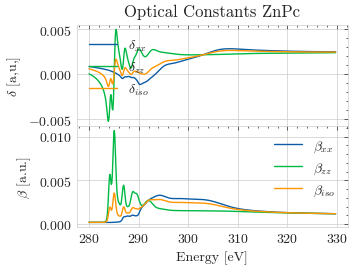

In [ ]:
dft.get_kk()
dft.plot_delta_beta()
dft

Since the kramers kronig transformation produces a numerically interpolated function, we can calculate the orpical constants at every point across the measured absorbtion edge.

(240.0, 275.0)

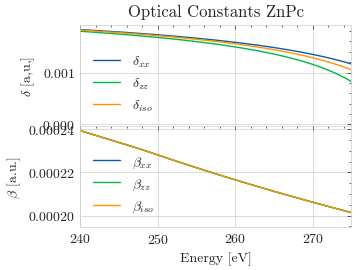

In [ ]:
refl_energies = [275, 280, 282, 282.3, 282.5, 282.7, 282.9, 283.1, 283.3, 283.5, 283.7, 284, 284.2, 286.7, 287.8, 289]
dft.plot_delta_beta(en_range = (240,280),  dpi = 1500)

AttributeError: 'AngleNexafs' object has no attribute 'sld'

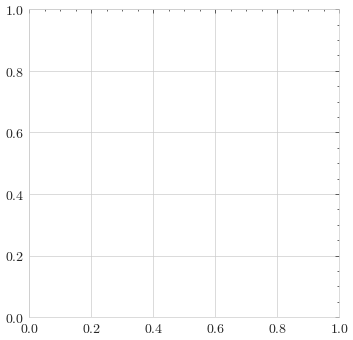

In [291]:
en = np.linspace(250, 283, 1000)

fig, ax = plt.subplots(figsize=(4, 4), edgecolor="white", facecolor="white")
ax.plot(en, dft.sld.delta(en), label=r"$\delta$")
ax.plot(en, dft.sld.xx(en), label=r"$\delta_{xx}$")
ax.plot(en, dft.sld.zz(en), label=r"$\delta_{zz}$")

ax.plot(en, dft.sld.beta(en)-.002)
ax.plot(en, dft.sld.ixx(en)-.002)
ax.plot(en, dft.sld.izz(en)-.002)
ax.grid(False)
ax.set_xlim(250, 283)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlabel("Energy (eV)", fontsize=16)
ax.set_ylabel("Optical Constants", fontsize=16)
ax.axhline(0, color="black", lw=.5)
ax.legend()

fig.savefig("Optical Constants.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")

## Saving the data

The `to_db()` method saves the data to a "database"... In reality, it is just a special directory structure that is used to store the data. The directory structure is set up as follows:

### Dicectory Structure

```
.db 
    db.json
    - .data
        - nexafs
        - xrr
    - .ocs
    - .struct
```



In [8]:
dft.to_db()

In [9]:
dft.sld(283)

array([ 0.00058268+0.00020526j, -0.00190696+0.00021794j])

## Loading Non Angle Resolved Data

By passing in the `angles = None` arguement, the `AngleNexafs` class will load the data as a standard `DataFrame` object. This is useful for loading data from the database for use in other applications. You can then additionally apply all kramers kronig transformations to the data.

C:\Users\hduva\pyref\src\pyref\core\frame.py:532: UserWarning: Normalizing only the isotropic data. NEXAFS is likely only one angle.
  warnings.warn(


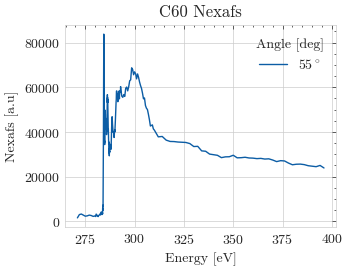

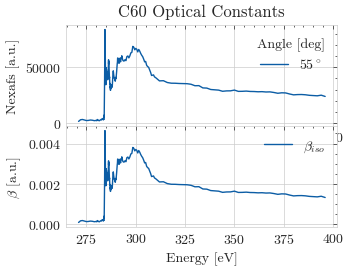

In [267]:
c60_f = db.nexafs / "C60.raw"
C60 = rf.AngleNexafs(c60_f, molecular_name = "C60", density=1.65, name = "C60", angles = None, read_kwargs={"sep": "\t"}) # type: ignore
C60.plot_ar()

# apply kk
C60.get_ooc()
# C60.get_kk()
# C60.plot_delta_beta()
# C60.to_db()

# Loading Other Materials

The above method uses the `pyref` module to load the data. This is a simple interface to the `pandas` moduel. In some instances, it is easier to load the data directly from the `pandas` module.

,$\beta_{iso}$,$\delta_{iso}$
Energy [eV],,
10.0000,2.830563e-01,-3.955647e-01
10.1617,2.892839e-01,-9.213715e-02
10.3261,2.956436e-01,-4.841477e-02
10.4931,3.021468e-01,-2.923568e-02
10.6628,3.087919e-01,-2.098633e-02
...,...,...
28135.1000,2.284680e-11,3.103671e-07
28590.1990,2.129574e-11,3.005673e-07
29052.6000,1.985096e-11,2.910797e-07


AttributeError: 'AngleNexafs' object has no attribute 'sld'

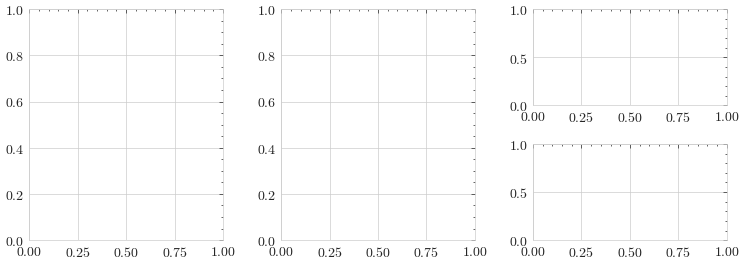

In [268]:
import pandas as pd
import numpy as np

PS = pd.read_csv(db.nexafs / "PS.raw", index_col = 0, sep = "\t", names = [r"$\beta_{iso}$", r"$\delta_{iso}$"], skiprows = 1)
PS.index.name = "Energy [eV]"
display(PS)

fig, ax = plt.subplot_mosaic([["b", "o", "ood"], ["b", "o", "oob"]], figsize=(9, 3), edgecolor="white", facecolor="white", gridspec_kw={"wspace": 0.3, "hspace": 0.4})

en = np.linspace(270, 340, 1000)

ax["b"].plot(en, dft.sld.beta(en), label=r"OD")
ax["b"].set_ylabel("Optical Density", fontsize=16)
ax["b"].set_xlim(270, 340)
ax["b"].set_ylim(0, .004)
ax["b"].grid(False)
ax["b"].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax["o"].plot(en, dft.sld.beta(en), label=r"$\beta$")
ax["o"].plot(en, dft.sld.delta(en), label=r"$\delta$")
ax["o"].set_ylabel(r"Optical Constants", fontsize=16)
ax["o"].set_xlim(270, 340)
ax["o"].grid(False)
ax["o"].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax["o"].legend()

ax["ood"].plot(en, dft.sld.delta(en), label=r"$\delta_{iso}$")
ax["ood"].plot(en, dft.sld.xx(en), label=r"$\delta_{xx}$")
ax["ood"].plot(en, dft.sld.zz(en), label=r"$\delta_{zz}$")
ax["ood"].set_ylabel(r"$\delta$", fontsize=16)
ax["ood"].set_xlim(270, 340)
ax["ood"].grid(False)
ax["ood"].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax["ood"].legend(loc="lower right")

ax["oob"].plot(en, dft.sld.beta(en), label=r"$\beta_{iso}$")
ax["oob"].plot(en, dft.sld.ixx(en), label=r"$\beta_{xx}$")
ax["oob"].plot(en, dft.sld.izz(en), label=r"$\beta_{zz}$")
ax["oob"].set_ylabel(r"$\beta$", fontsize=16)
ax["oob"].set_xlim(270, 340)
ax["oob"].grid(False)
ax["oob"].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax["oob"].legend()




fig.savefig("Optical Constant Calculation.svg", dpi=300, bbox_inches="tight", edgecolor="white", facecolor="white")

In this example, the data is loaded from a csv file where the kramers kronig transforms are allready calculated. Luckily, C60 is a simple material, so we wont be needing orientation data. 

Now, we can plot and compare all the oriented optical constants for the C60 | ZnPc bilayer. 

NameError: name 'PS' is not defined

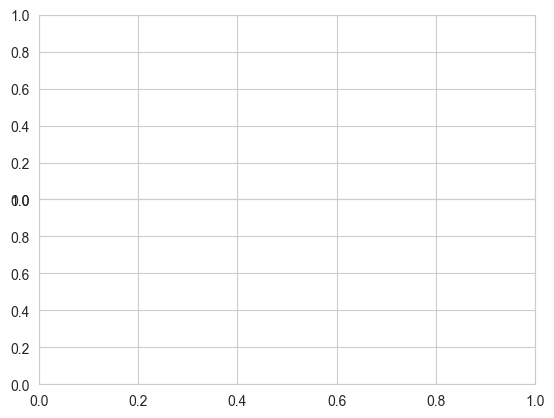

In [7]:
fig, ax = plt.subplots(nrows = 2, sharex = True, gridspec_kw={"height_ratios": [1, 1], "hspace": 0})
PS.plot(ax = ax[0], y = r"$\delta_{iso}$", xlim = (270, 290), ylim = (-0.005, 0.003))
PS.plot(ax = ax[1], y = r"$\beta_{iso}$", xlim = (270, 290), ylim = (0, 0.005))

ens = PS.index.values

ax[0].plot(ens, dft.iso.delta(ens))
ax[1].plot(ens, dft.iso.beta(ens))

ax[0].set_ylabel(r"$\delta_{iso}$")
ax[1].set_ylabel(r"$\beta_{iso}$")
ax[1].set_xlabel("Energy [eV]")
ax[0].set_title("Comparison of Optical Constants PS and ZnPc")

for en in refl_energies:
    ax[0].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)
    ax[1].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)

ax[0].legend([r"C60 $\delta_{iso}$", r"ZnPc $\delta_{iso}$"])
ax[1].legend([r"C60 $\beta_{iso}$", r"ZnPc $\beta_{iso}$"])

## Loading the pandas dataframes into the database

To load a pandas dataframe into the database, we use `df_to_db()`. This method takes a dataframe and a name as inputs. The name is used to create a directory in the database. The dataframe is saved similarly to the `to_db()` method.

In [ ]:
rf.df_to_db(PS, "PS", "iso")

# Figure Generation

In [9]:
import numpy as np


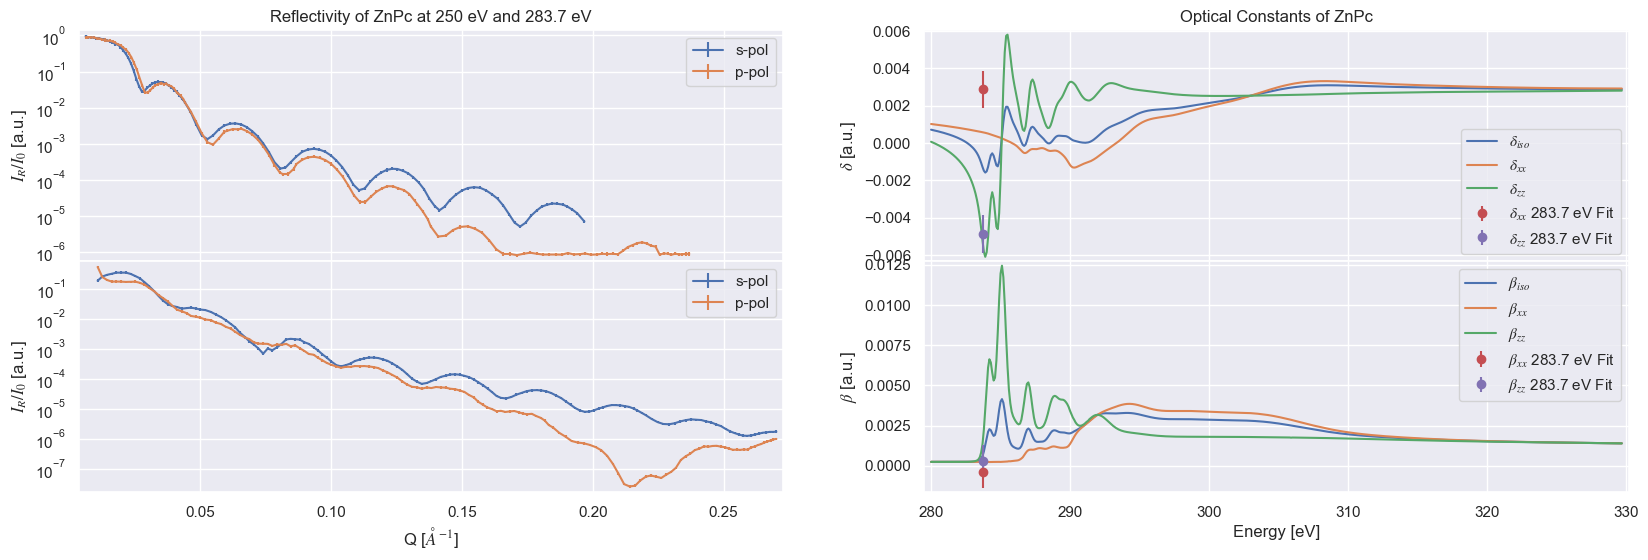

In [14]:
fig, ax = plt.subplots(figsize = (20, 6),nrows = 2, ncols = 2, sharex = "col", gridspec_kw={"hspace": 0})

sns.set_style("darkgrid")


# load refl data

znpc_mono = {
    "250": {
        "s": db.get_refl("zrt_250.0_100.csv", "ZnPc"),
        "p": db.get_refl("zrt_250.0_190.csv", "ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("ZnPc_283.7_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_283.7_190.0 (CCD Scan 82869).parquet", "ZnPc"),
        },
}

znpc_mono["250"]["s"].iloc[5:].plot(ax = ax[0,0], x = "Q", y = "Refl", yerr = "Err", label = "s-pol")
znpc_mono["250"]["p"].iloc[5:].plot(ax = ax[0,0], x = "Q", y = "Refl", yerr = "Err", label = "p-pol")

znpc_mono["283.7"]["s"].iloc[5:].plot(ax = ax[1,0], x = "Q", y = "Refl", yerr = "Err", label = "s-pol")
znpc_mono["283.7"]["p"].iloc[5:].plot(ax = ax[1,0], x = "Q", y = "Refl", yerr = "Err", label = "p-pol")
#

dft.plot(ax = ax[0,1], y = [r"$\delta_{iso}$", r"$\delta_{xx}$", r"$\delta_{zz}$"])
ax[0,1].errorbar(283.7, fake_xx, yerr = 0.001, label = r"$\delta_{xx}$ 283.7 eV Fit", marker = "o", linestyle = "")
ax[0,1].errorbar(283.7, fake_zz, yerr = 0.001, label = r"$\delta_{zz}$ 283.7 eV Fit", marker = "o", linestyle = "")
dft.plot(ax = ax[1,1], y = [r"$\beta_{iso}$", r"$\beta_{xx}$", r"$\beta_{zz}$"])
ax[1,1].errorbar(283.7, fake_ixx, yerr = 0.001, label = r"$\beta_{xx}$ 283.7 eV Fit", marker = "o", linestyle = "")
ax[1,1].errorbar(283.7, fake_izz, yerr = 0.001, label = r"$\beta_{zz}$ 283.7 eV Fit", marker = "o", linestyle = "")

ax[0,0].legend()
ax[1,0].legend()
ax[0,1].legend()
ax[1,1].legend()

ax[0,0].set(
    xlabel = r"Q [$\AA^{-1}$]",
    ylabel = r"$I_R / I_0$ [a.u.]",
    title = "Reflectivity of ZnPc at 250 eV and 283.7 eV",
    yscale = "log"
)
ax[1,0].set(
    xlabel = r"Q [$\AA^{-1}$]",
    ylabel = r"$I_R / I_0$ [a.u.]",
    yscale = "log"
)
ax[0,1].set(
    ylabel = r"$\delta$ [a.u.]",
    xlabel = "Energy [eV]",
    title = "Optical Constants of ZnPc"
)
ax[1,1].set(
    ylabel = r"$\beta$ [a.u.]",
    xlabel = "Energy [eV]",
)

fig.savefig("ZnPc_283.7_fit.png", dpi = 600)